In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
df = pd.read_csv("fatansy_data.csv", index_col='Unnamed: 0')

/Users/zachchase/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3553: DtypeWarning: Columns (52) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
0,Lamar Jackson,qb,2019,33.6,30.9,21.3,26.5,14.4,30.6,23.3,NaN,28.6,33.4,32.8,36.3,22.3,20.8,37.1,29.8,NaN,421.7,15.0,28.113333,1.0,1.0,2.0,10.0,2.5,17.0,3.0,6.0,NaN,3.0,1.0,2.0,1.0,11.0,11.0,1.0,4.0,NaN,421.7,28.113333,29.80,128.3,8.01875,96.5,10.8,10.0,85.7,107.3,BAL
1,Patrick Mahomes,qb,2018,28.3,38.8,25.3,22.9,15.8,27.0,32.8,26.0,26.8,20.1,35.9,NaN,33.0,20.8,18.0,28.2,17.3,417.0,16.0,26.062500,1.0,4.0,2.0,7.0,11.0,17.0,6.0,1.0,5.0,4.0,13.0,1.0,NaN,1.0,6.0,8.0,6.0,15.0,417.0,26.062500,26.40,123.6,7.72500,119.4,9.8,13.0,109.6,129.2,KC
2,Christian McCaffrey,rb,2019,37.9,6.3,26.3,28.9,44.7,19.7,NaN,25.5,36.1,23.1,24.6,29.8,13.7,19.0,33.5,24.8,19.3,413.2,16.0,25.825000,1.0,1.0,42.0,4.0,3.0,2.0,8.0,NaN,5.0,1.0,4.0,1.0,2.0,19.0,9.0,2.0,6.0,10.0,413.2,25.825000,25.15,247.9,15.49375,3.1,1.1,1.0,2.0,4.2,CAR
3,Josh Allen,qb,2020,28.2,34.5,32.2,25.4,18.3,16.1,16.4,13.5,36.0,28.9,NaN,16.5,30.1,19.3,37.7,32.3,20.3,405.7,16.0,25.356250,1.0,3.0,3.0,3.0,6.0,15.0,17.0,20.0,19.5,2.0,4.0,NaN,16.0,2.0,12.5,2.0,1.0,13.0,405.7,25.356250,26.80,112.3,7.01875,92.7,8.7,10.0,84.0,101.4,BUF
4,Josh Allen,qb,2021,17.2,17.7,37.2,21.0,36.5,29.7,0.0,29.5,11.6,21.9,18.2,28.7,11.7,36.2,21.8,31.0,23.9,393.8,17.0,23.164706,1.0,21.5,20.0,1.0,13.0,4.0,1.0,77.5,1.0,20.0,3.0,13.0,1.0,23.0,1.0,7.0,3.0,4.0,393.8,23.164706,21.90,100.4,6.27500,34.6,5.5,4.0,29.1,40.1,BUF


In [6]:
def find_selection(player = None, position = None, team = None, season = None, sort = 'VOR_Total', asc = False):
    
    temp = df.copy()
    
    if player is not None:
        temp = temp[temp['player'] == player]
    
    if position is not None:
        temp = temp[temp['pos'] == position]
    
    if team is not None:
        temp = temp[temp['team'] == team]
    
    if season is not None:
        temp = temp[temp['season'] == season]

    return temp.sort_values(by = sort, ascending = asc)

def get_draft_value(position):
    
    vor_total = []
    vor_average = []
    
    for i in np.arange(1,150,.1):
        temp = df[df['pos'] == position]
        temp = temp[((temp['low_std'] - 2 * temp['std.dev']) <= i) & ((temp['high_std'] + 2 * temp['std.dev']) >= i)]
        vor_total.append(temp['VOR_Total'].mean())
        vor_average.append(temp['VOR_Avg'].mean())
    
    return vor_total, vor_average

def plot_draft_value(positions = ['qb', 'rb', 'wr', 'te']):
    
    fig = plt.figure(figsize = (10, 8))
    
    for i in positions:
        vor_total, vor_average = get_draft_value(i)
        
        sns.lineplot(x = np.arange(1,150,.1), y = vor_total, label = i)
    plt.axhline(y = 0, color = 'black')
    plt.legend()
    plt.show()
        
def compare_players(players):
    
    return

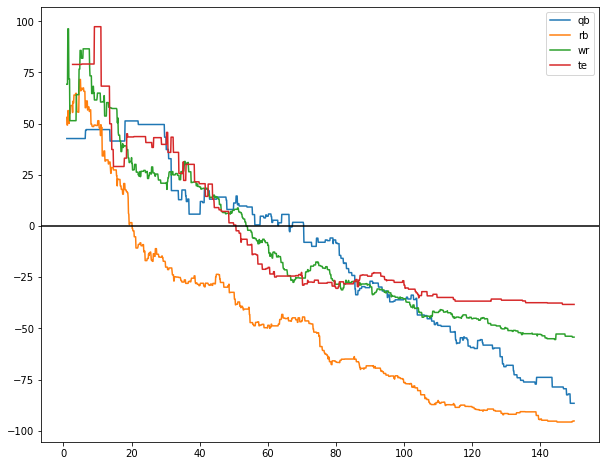

In [74]:
plot_draft_value()

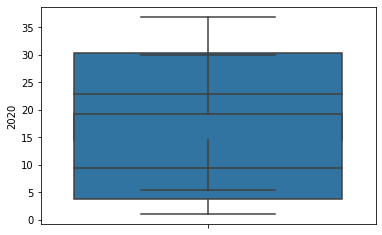

In [69]:
weeks = ['season'] + ['week{}'.format(i) for i in range(1,18)]
weeks_rank = ['season'] + ['week{}_rank'.format(i) for i in range(1,18)]
tb = df[df['player'] == 'Tom Brady']
tb_weeks = tb[weeks].set_index(['season'])
tb_ranks = tb[weeks_rank].set_index(['season'])

sns.boxplot(y=tb_weeks.T[2020])
sns.boxplot(y=tb_ranks.T[2020])
plt.show()
#tb_weeks.T[2020]

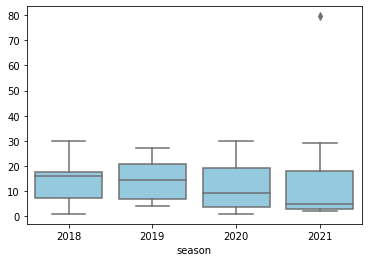

In [100]:
weeks = ['season'] + ['week{}'.format(i) for i in range(1,18)]
weeks_rank = ['season'] + ['week{}_rank'.format(i) for i in range(1,18)]
tb = df[df['player'] == 'Tom Brady'][weeks_rank].set_index(['season']).sort_values(by = 'season').T
bp = sns.boxplot(data=tb, color = 'skyblue')

In [26]:
find_selection(player = 'Justin Jefferson')

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
87,Justin Jefferson,wr,2021,10.0,15.5,22.3,17.4,15.9,10.0,0.0,3.1,15.5,18.4,33.2,11.3,30.1,17.0,12.7,15.6,8.8,256.8,17.0,15.105882,5.0,49.0,18.0,5.0,10.0,18.0,33.5,254.0,75.5,11.0,7.0,1.0,26.0,1.0,10.0,16.0,16.0,40.0,256.8,15.105882,15.50,108.5,6.78125,23.2,2.4,3.0,20.8,25.6,MIN
123,Justin Jefferson,wr,2020,3.6,5.9,27.0,12.3,3.8,35.1,NaN,4.1,7.9,17.5,16.1,22.5,22.8,7.9,14.4,11.5,17.8,230.2,16.0,14.387500,6.0,78.5,68.0,2.0,30.5,71.5,1.0,NaN,66.0,51.5,14.0,13.0,7.0,4.0,44.5,19.5,27.0,15.0,230.2,14.387500,13.35,81.9,5.11875,135.4,9.0,15.0,126.4,144.4,MIN


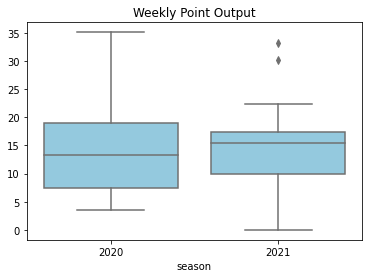

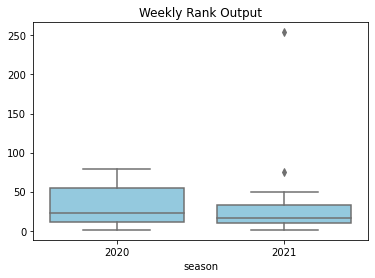

In [25]:
def plot_player(p):
    weeks = ['season'] + ['week{}'.format(i) for i in range(1,18)]
    weeks_rank = ['season'] + ['week{}_rank'.format(i) for i in range(1,18)]
    
    p_df_output = df[df['player'] == p][weeks].set_index(['season']).sort_values(by = 'season').T
    p_df_rank = df[df['player'] == p][weeks_rank].set_index(['season']).sort_values(by = 'season').T
    
    bp = sns.boxplot(data=p_df_output, color = 'skyblue')
    plt.title("Weekly Point Output")
    plt.show()
    
    bp2 = sns.boxplot(data=p_df_rank, color = 'skyblue')
    plt.title("Weekly Rank Output")
    plt.show()
    
plot_player('Justin Jefferson')

In [111]:
df[(df['team'] == 'ATL']

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
12,Matt Ryan,qb,2018,8.8,30.7,40.2,29.3,14.4,27.5,19.3,NaN,28.0,20.5,13.7,20.7,7.6,20.5,25.0,19.5,28.8,354.5,16.0,22.156250,2.0,24.0,5.0,2.0,8.0,19.0,4.0,12.0,NaN,3.0,12.0,18.0,11.5,29.0,7.0,1.0,12.0,4.0,354.5,22.156250,20.60,61.1,3.81875,113.5,11.4,12.0,102.1,124.9,ATL
49,Matt Ryan,qb,2020,24.9,28.5,12.4,12.4,7.9,31.6,17.5,18.9,23.4,NaN,7.3,14.9,12.9,10.3,27.8,19.9,22.7,293.3,16.0,18.331250,12.0,7.0,6.0,27.0,25.0,25.0,2.0,16.0,10.5,11.5,NaN,25.5,17.5,25.5,28.0,7.0,14.5,12.0,293.3,18.331250,18.20,-0.1,-0.00625,81.4,7.5,9.0,73.9,88.9,ATL
65,Matt Ryan,qb,2019,20.6,22.1,23.5,15.7,32.9,30.9,3.6,NaN,NaN,15.6,16.4,8.6,18.6,21.3,19.1,18.0,14.5,281.4,15.0,18.760000,11.0,14.0,8.0,7.5,16.0,2.0,2.0,30.0,NaN,NaN,15.0,15.0,23.0,13.0,10.0,9.0,12.0,19.0,281.4,18.760000,18.60,-12.0,-0.75000,70.8,6.4,8.0,64.4,77.2,ATL
77,Julio Jones,wr,2018,23.0,8.9,12.1,21.8,8.7,19.4,12.9,NaN,21.6,20.2,20.8,18.3,2.8,26.6,17.2,10.8,24.3,269.4,16.0,16.837500,5.0,8.0,50.5,32.0,9.0,41.5,11.0,20.0,NaN,3.0,8.0,10.0,7.5,85.0,3.0,9.0,30.5,4.5,269.4,16.837500,18.85,121.1,7.56875,14.4,1.9,2.0,12.5,16.3,ATL
114,Calvin Ridley,wr,2020,29.4,26.4,14.2,0.0,17.6,15.9,17.4,5.7,NaN,NaN,11.5,14.0,13.3,22.4,27.3,14.8,6.6,236.5,15.0,15.766667,4.0,2.0,1.0,26.0,133.0,13.0,11.0,14.0,55.5,NaN,NaN,29.0,18.5,28.5,5.0,1.0,17.0,53.5,236.5,15.766667,14.80,88.2,5.51250,42.4,3.9,5.0,38.5,46.3,ATL
133,Julio Jones,wr,2019,12.1,25.1,22.8,7.3,5.7,14.8,12.3,20.2,NaN,9.4,11.7,9.3,NaN,9.1,31.9,21.6,11.3,224.6,15.0,14.973333,3.0,32.0,2.5,8.0,36.0,53.5,12.0,20.0,6.0,NaN,31.0,20.0,32.0,NaN,43.0,2.0,4.0,28.0,224.6,14.973333,12.10,76.3,4.76875,10.5,1.9,2.0,8.6,12.4,ATL
137,Matt Ryan,qb,2021,7.4,19.3,15.6,29.0,21.6,0.0,18.4,8.1,28.5,2.7,4.1,11.2,12.1,11.9,13.4,13.1,6.6,223.0,17.0,13.117647,20.0,30.0,16.0,22.0,3.0,12.0,77.5,14.0,31.0,3.0,33.0,29.0,24.0,22.0,23.5,16.0,20.0,29.0,223.0,13.117647,12.10,-70.4,-4.40000,123.8,14.1,13.0,109.7,137.9,ATL
263,Tevin Coleman,rb,2018,11.0,14.5,11.7,9.2,4.0,10.6,15.2,NaN,30.1,7.8,10.0,9.8,1.6,4.6,20.5,5.1,11.9,177.6,16.0,11.100000,19.0,24.0,13.5,27.0,28.0,52.0,20.0,14.0,NaN,4.0,33.0,23.0,27.5,70.0,47.0,9.0,46.0,16.5,177.6,11.100000,10.30,12.3,0.76875,69.2,6.0,7.0,63.2,75.2,ATL
275,Calvin Ridley,wr,2018,0.0,14.7,37.0,19.5,5.8,6.2,6.8,NaN,16.7,5.5,5.2,17.3,3.7,1.5,6.7,16.5,11.7,174.8,16.0,10.925000,20.0,133.5,26.5,1.0,12.0,69.0,56.0,47.0,NaN,11.0,50.0,54.5,12.0,77.0,94.0,43.5,11.0,30.0,174.8,10.925000,6.75,26.5,1.65625,123.0,9.4,13.0,113.6,132.4,ATL
291,Devonta Freeman,rb,2019,2.6,7.9,11.0,14.0,15.5,25.3,3.5,12.2,NaN,6.3,NaN,NaN,8.4,17.4,6.5,29.2,8.3,168.1,14.0,12.007143,21.0,62.0,32.5,25.0,18.0,16.0,3.0,46.5,17.0,NaN,31.0,NaN,NaN,33.5,11.0,37.0,3.0,34.0,168.1,12.007143,9.70,2.8,0.17500,29.4,3.3,3.0,26.1,32.7,ATL


In [15]:
def get_single_player(player_name, drop_missing = True, year = 2021):
    
    Week_names = ['week{}'.format(i) for i in range(1,18)]
    player_df = df[(df['player'] == player_name) & (df['season'] == year)]
    position = player_df['pos']
    team = player_df['team']
    player_df = player_df[Week_names].T
    player_df.columns = [player_name]
    if drop_missing:
        player_df = player_df[player_df[player_name] != -1]
    med = player_df[player_name].median()
    
    return player_df, med

def boxplot_players(players):
    
    all_df = []
    all_med = []
    games_played = []
    
    fig, ax1 = plt.subplots(figsize=(10, 6))
    
    for i in players:
        player_data = get_single_player(i)
        all_df.append(player_data[0])
        all_med.append(round(player_data[1], 2))
        games_played.append(player_data[0].shape[0])

    all_df = pd.concat(all_df)
    bp = sns.boxplot(data=all_df, color = 'skyblue')
    bp.set_xticklabels(bp.get_xticklabels(),rotation=90)
    
    up_offset = [i * .05 for i in all_med]
    down_offset = [i * .15 for i in all_med]
    
    for xtick in bp.get_xticks():
        bp.text(xtick,all_med[xtick] + up_offset[xtick],all_med[xtick], 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
        bp.text(xtick,all_med[xtick] - down_offset[xtick],games_played[xtick], 
                horizontalalignment='center',size='x-large',color='black',weight='semibold')
        
    


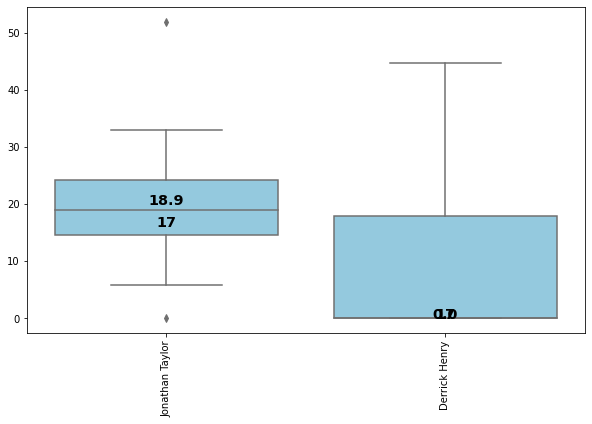

In [31]:
boxplot_players(['Jonathan Taylor', 'Derrick Henry'])

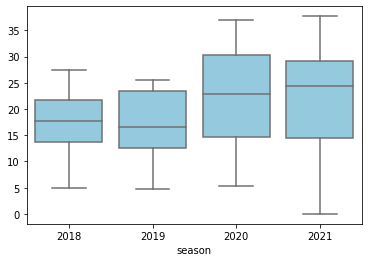

In [19]:
plot_player('Tom Brady')

In [32]:
find_selection(player = 'Derrick Henry').sort_values(by = 'season', ascending = False)

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
234,Derrick Henry,rb,2021,9.2,44.7,17.9,24.7,31.0,34.6,15.4,6.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3,17.0,10.841176,14.0,29.0,1.0,11.0,4.0,1.0,1.0,11.5,40.0,131238.0,131235.5,131239.0,131236.0,131232.0,131230.0,131236.0,131240.0,131239.0,184.3,10.841176,0.00,19.0,1.18750,3.7,1.2,1.0,2.5,4.9,TEN
33,Derrick Henry,rb,2020,14.6,8.4,26.0,NaN,18.8,39.4,14.2,17.2,6.8,11.4,19.7,37.5,5.4,35.2,24.2,9.8,35.0,323.6,16.0,20.225000,2.0,14.0,36.0,4.0,NaN,7.0,1.0,13.0,8.0,37.0,22.0,3.0,1.0,38.5,1.0,4.0,26.0,2.0,323.6,20.225000,18.00,158.3,9.89375,6.6,1.6,1.0,5.0,8.2,TEN
54,Derrick Henry,rb,2019,28.4,16.4,11.1,11.3,13.8,3.8,17.3,6.8,23.4,32.1,NaN,28.0,22.1,23.4,8.6,NaN,39.1,285.6,15.0,19.040000,3.0,3.0,8.0,24.0,23.0,20.0,45.0,7.0,35.0,5.0,1.0,NaN,3.0,5.0,5.0,31.5,NaN,1.0,285.6,19.040000,17.30,120.3,7.51875,40.5,4.7,5.0,35.8,45.2,TEN
210,Derrick Henry,rb,2018,3.6,5.9,5.7,4.1,5.6,3.1,13.5,NaN,10.2,17.8,4.6,3.9,11.5,47.8,29.7,15.0,11.1,193.1,16.0,12.068750,14.0,57.5,41.5,42.0,43.0,43.0,50.5,18.0,NaN,20.0,14.0,34.0,47.0,24.0,1.0,1.0,13.0,21.0,193.1,12.068750,8.05,27.8,1.73750,37.3,5.1,4.0,32.2,42.4,TEN


In [62]:
df[df['player'] == 'Cam Akers'].sort_values(by = 'season', ascending = False)

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
265345,Cam Akers,rb,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.000,131288.5,131238.5,131239.0,131239.0,131236.5,131236.5,131232.5,131233.5,131235.5,131236.5,131234.5,131237.5,131235.0,131231.0,131229.0,131235.0,131239.0,131237.5,0.0,0.000,0.0,-165.3,-10.33125,NaN,NaN,NaN,NaN,NaN,LAR
625,Cam Akers,rb,2020,4.8,1.3,NaN,NaN,6.1,0.0,NaN,5.9,NaN,3.8,8.4,14.4,15.9,20.4,6.7,NaN,8.6,96.3,12.0,8.025,43.0,53.0,79.0,NaN,NaN,37.0,89.0,NaN,39.0,NaN,44.0,30.5,14.0,12.0,8.0,41.0,NaN,35.5,96.3,8.025,6.4,-69.0,-4.31250,52.2,5.9,6.0,46.3,58.1,LAR


In [64]:
find_selection(team = 'LAR', position = 'rb').sort_values(by='season',ascending=False)

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
265620,Gregory Howell,rb,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LAR
366,Darrell Henderson,rb,2021,15.2,15.7,0.0,14.1,16.4,23.7,7.9,21.8,7.3,6.1,0.0,15.3,0.0,0.0,3.7,1.7,0.0,148.9,17.0,8.758824,25.0,15.0,13.0,131239.0,19.0,16.0,5.0,28.0,3.0,37.0,37.5,131237.5,14.0,131231.0,131229.0,52.0,68.5,131237.5,148.9,8.758824,7.30,-16.4,-1.02500,35.7,3.3,4.0,32.4,39.0,LAR
436,Sony Michel,rb,2021,0.2,4.6,9.4,-0.9,11.0,4.2,0.4,6.6,9.6,4.1,0.0,3.0,20.4,7.9,12.5,20.0,17.4,130.4,17.0,7.670588,30.0,83.5,48.0,28.5,262391.0,27.0,42.5,71.0,41.5,29.0,46.5,131237.5,55.5,4.0,30.0,15.0,8.0,15.0,130.4,7.670588,6.60,-34.9,-2.18125,114.1,13.2,12.0,100.9,127.3,LAR
265345,Cam Akers,rb,2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.000000,131288.5,131238.5,131239.0,131239.0,131236.5,131236.5,131232.5,131233.5,131235.5,131236.5,131234.5,131237.5,131235.0,131231.0,131229.0,131235.0,131239.0,131237.5,0.0,0.000000,0.00,-165.3,-10.33125,NaN,NaN,NaN,NaN,NaN,LAR
2283,Jake Funk,rb,2021,0.0,0.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.1,0.0,0.5,17.0,0.029412,158.0,131238.5,131239.0,75.0,131236.5,131236.5,131232.5,131233.5,131235.5,131236.5,131234.5,131237.5,131235.0,131231.0,131229.0,131235.0,262392.5,131237.5,0.5,0.029412,0.00,-164.8,-10.30000,NaN,NaN,NaN,NaN,NaN,LAR
2250,Mekhi Sargent,rb,2021,0.2,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.9,17.0,0.052941,155.5,83.5,131239.0,81.5,131236.5,131236.5,131232.5,131233.5,131235.5,131236.5,131234.5,131237.5,131235.0,68.0,131229.0,131235.0,131239.0,131237.5,0.9,0.052941,0.00,-164.4,-10.27500,NaN,NaN,NaN,NaN,NaN,LAR
485,Darrell Henderson,rb,2020,0.6,19.1,18.5,4.2,20.3,9.2,8.6,6.3,NaN,9.8,1.9,1.9,14.4,0.5,0.8,6.2,NaN,122.3,15.0,8.153333,36.0,82.0,10.5,11.0,46.5,6.0,22.0,26.0,38.0,NaN,24.0,57.0,65.0,14.0,81.0,84.0,43.5,NaN,122.3,8.153333,6.30,-43.0,-2.68750,114.3,8.7,12.0,105.6,123.0,LAR
620,Malcolm Brown,rb,2020,24.5,4.7,1.9,8.2,2.9,3.7,11.7,6.7,NaN,18.1,3.3,0.9,3.2,0.0,1.5,4.0,2.3,97.6,16.0,6.100000,42.0,4.0,53.5,66.5,35.0,51.0,43.0,20.0,36.5,NaN,11.0,46.0,71.5,49.5,102.5,71.0,52.0,58.0,97.6,6.100000,3.50,-67.7,-4.23125,NaN,NaN,NaN,NaN,NaN,LAR
625,Cam Akers,rb,2020,4.8,1.3,NaN,NaN,6.1,0.0,NaN,5.9,NaN,3.8,8.4,14.4,15.9,20.4,6.7,NaN,8.6,96.3,12.0,8.025000,43.0,53.0,79.0,NaN,NaN,37.0,89.0,NaN,39.0,NaN,44.0,30.5,14.0,12.0,8.0,41.0,NaN,35.5,96.3,8.025000,6.40,-69.0,-4.31250,52.2,5.9,6.0,46.3,58.1,LAR
265231,Raymond Calais,rb,2020,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4.0,0.000000,172.0,NaN,NaN,108.0,100.5,NaN,NaN,88.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.5,0.0,0.000000,0.00,-165.3,-10.33125,NaN,NaN,NaN,NaN,NaN,LAR


In [46]:
df[df['season'] == 2021].sort_values(by = 'VOR_Total', ascending = False).head(50)

,player,pos,season,week1,week2,week3,week4,week5,week6,week7,week8,week9,week10,week11,week12,week13,week14,week15,week16,week17,total,games_played,avg,pos_rank,week1_rank,week2_rank,week3_rank,week4_rank,week5_rank,week6_rank,week7_rank,week8_rank,week9_rank,week10_rank,week11_rank,week12_rank,week13_rank,week14_rank,week15_rank,week16_rank,week17_rank,rank_total,rank_avg,rank_median,VOR_Total,VOR_Avg,overall,std.dev,round,low_std,high_std,team
17,Cooper Kupp,wr,2021,20.3,32.3,26.1,8.9,12.7,29.5,32.6,21.0,15.0,17.7,0.0,15.1,22.9,24.8,30.2,16.3,18.5,343.9,17.0,20.229412,1.0,11.0,1.0,2.0,42.0,24.0,2.0,1.0,6.0,12.0,8.0,261.5,13.0,4.0,2.0,1.0,12.0,6.0,343.9,20.229412,20.3,195.6,12.22500,47.4,4.3,5.0,43.1,51.7,LAR
20,Jonathan Taylor,rb,2021,14.6,5.8,7.7,18.9,30.4,28.3,16.5,19.7,33.0,21.6,51.9,17.7,24.3,0.0,23.0,10.8,17.9,342.1,17.0,20.123529,1.0,16.0,42.0,35.0,9.0,2.5,2.0,7.0,6.5,2.0,4.0,1.0,12.0,2.0,131230.0,2.0,23.0,14.0,342.1,20.123529,18.9,176.8,11.05000,11.9,2.4,2.0,9.5,14.3,IND
70,Davante Adams,wr,2021,8.1,16.1,25.2,9.4,32.1,10.9,16.6,0.0,7.2,11.3,27.0,14.4,0.0,29.1,13.4,28.4,25.1,274.3,17.0,16.135294,2.0,58.0,15.0,3.0,39.0,2.0,28.0,9.5,259.0,39.0,23.0,2.0,16.0,261.0,1.0,15.0,2.0,4.0,274.3,16.135294,14.4,126.0,7.87500,7.0,1.7,1.0,5.3,8.7,GB
72,Deebo Samuel,wr,2021,27.4,13.1,7.7,31.7,14.6,0.0,17.5,20.1,8.8,27.8,15.9,20.3,0.0,12.4,16.9,23.6,15.7,273.5,17.0,16.088235,3.0,3.0,28.0,50.5,2.0,19.0,262.0,8.0,8.0,27.5,1.0,16.0,5.0,261.0,30.0,10.0,5.0,16.5,273.5,16.088235,15.9,125.2,7.82500,88.2,5.7,10.0,82.5,93.9,SF
63,Austin Ekeler,rb,2021,11.7,18.0,19.7,28.0,30.4,7.5,0.0,21.4,9.7,13.4,38.5,18.9,14.9,15.4,16.2,0.0,18.7,282.4,17.0,16.611765,2.0,19.0,6.0,8.0,2.0,2.5,34.5,131235.0,4.0,28.0,17.0,2.0,7.0,16.5,13.0,5.0,131240.0,11.0,282.4,16.611765,16.2,117.1,7.31875,10.7,2.0,2.0,8.7,12.7,LAC
84,JaMarr Chase,wr,2021,18.4,12.4,20.5,10.7,24.9,11.7,30.1,11.6,5.9,0.0,11.5,5.4,7.7,22.8,0.8,16.0,50.1,260.5,17.0,15.323529,4.0,14.0,35.0,6.0,30.5,6.0,24.5,2.0,27.0,48.0,257.5,27.0,53.0,37.0,4.0,108.0,13.5,1.0,260.5,15.323529,11.7,112.2,7.01250,77.3,6.3,8.0,71.0,83.6,CIN
117,Mark Andrews,te,2021,3.5,8.2,13.4,9.2,36.2,15.3,6.3,0.0,6.9,15.3,11.3,14.5,7.0,23.0,30.6,22.5,11.9,235.1,17.0,13.829412,1.0,33.5,13.0,6.0,12.0,1.0,3.0,19.0,145.5,20.0,3.0,6.0,4.0,13.0,2.0,2.0,1.0,3.0,235.1,13.829412,11.9,108.6,6.78750,53.1,5.7,6.0,47.4,58.8,BAL
87,Justin Jefferson,wr,2021,10.0,15.5,22.3,17.4,15.9,10.0,0.0,3.1,15.5,18.4,33.2,11.3,30.1,17.0,12.7,15.6,8.8,256.8,17.0,15.105882,5.0,49.0,18.0,5.0,10.0,18.0,33.5,254.0,75.5,11.0,7.0,1.0,26.0,1.0,10.0,16.0,16.0,40.0,256.8,15.105882,15.5,108.5,6.78125,23.2,2.4,3.0,20.8,25.6,MIN
78,Joe Mixon,rb,2021,23.0,7.6,9.9,13.2,10.0,23.8,11.9,23.1,25.5,0.0,24.3,30.3,9.4,7.8,6.5,28.5,12.1,266.9,17.0,15.700000,3.0,2.0,35.0,27.0,21.0,33.0,4.0,22.0,2.0,4.0,131235.5,3.0,2.0,24.0,31.0,38.0,2.0,24.0,266.9,15.700000,12.1,101.6,6.35000,17.3,2.1,2.0,15.2,19.4,CIN
4,Josh Allen,qb,2021,17.2,17.7,37.2,21.0,36.5,29.7,0.0,29.5,11.6,21.9,18.2,28.7,11.7,36.2,21.8,31.0,23.9,393.8,17.0,23.164706,1.0,21.5,20.0,1.0,13.0,4.0,1.0,77.5,1.0,20.0,3.0,13.0,1.0,23.0,1.0,7.0,3.0,4.0,393.8,23.164706,21.9,100.4,6.27500,34.6,5.5,4.0,29.1,40.1,BUF
